In [1]:
import itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

# Utilities
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
pd.options.display.max_columns = 100

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Importando el dataset

In [4]:
music_df = pd.read_csv( './data/msd_genre_dataset.txt' )

In [5]:
music_df.dtypes

genre              object
track_id           object
artist_name        object
title              object
loudness          float64
tempo             float64
time_signature      int64
key                 int64
mode                int64
duration          float64
avg_timbre1       float64
avg_timbre2       float64
avg_timbre3       float64
avg_timbre4       float64
avg_timbre5       float64
avg_timbre6       float64
avg_timbre7       float64
avg_timbre8       float64
avg_timbre9       float64
avg_timbre10      float64
avg_timbre11      float64
avg_timbre12      float64
var_timbre1       float64
var_timbre2       float64
var_timbre3       float64
var_timbre4       float64
var_timbre5       float64
var_timbre6       float64
var_timbre7       float64
var_timbre8       float64
var_timbre9       float64
var_timbre10      float64
var_timbre11      float64
var_timbre12      float64
dtype: object

In [6]:
music_df.head()

,genre,track_id,artist_name,title,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
0,classic pop and rock,TRFCOOU128F427AEC0,Blue Oyster Cult,Mes Dames Sarat,-8.697,155.007,1,9,1,246.33424,46.673067,14.613684,14.664215,0.176561,-9.346377,-12.341699,11.183382,7.405288,9.313765,3.201169,-0.152734,5.809709,14.930820,802.205948,1255.514569,580.030472,598.485223,575.337671,322.068603,321.726029,232.700609,186.805303,181.938688,151.508011
1,classic pop and rock,TRNJTPB128F427AE9F,Blue Oyster Cult,Screams,-10.659,148.462,1,4,0,189.80526,43.645377,-87.337150,41.051582,7.814770,-12.989848,-14.253599,6.126045,-2.448662,22.691713,-2.872706,1.427725,-6.710730,22.704843,1561.307072,2007.653070,1043.474073,585.694981,564.013736,510.177022,400.200186,365.119588,238.099708,197.933757,251.577525
2,classic pop and rock,TRLFJHA128F427AEEA,Blue Oyster Cult,Dance The Night Away,-13.494,112.909,1,10,0,158.19710,37.573538,-61.202030,28.760533,-13.788123,10.062347,-4.872030,-14.090243,5.580175,15.414011,4.556137,-1.877363,20.879475,58.459621,4644.001846,1204.856777,2736.520024,730.233239,665.203452,535.775111,439.335059,486.822970,265.333860,447.097987,251.880724
3,classic pop and rock,TRCQZAG128F427DB97,Blue Oyster Cult,Debbie Denise,-12.786,117.429,4,7,1,250.22649,42.566615,17.217897,53.484213,1.564362,-8.884632,-13.088890,-9.762620,1.373769,1.092876,1.479490,1.517015,8.562618,22.575460,691.140671,809.755802,563.908070,492.803819,378.382799,372.875044,231.941957,246.313305,168.400152,85.282462,339.897173
4,classic pop and rock,TRNXMNM128F427DB8C,Blue Oyster Cult,(Don't Fear) The Reaper,-14.093,141.536,4,9,0,307.06893,40.976507,-13.609779,39.566169,-5.602033,-17.754819,-21.833261,-5.600732,2.291770,3.526177,1.535449,2.763958,3.388757,34.294994,1062.180815,1093.684935,343.556047,889.163314,218.111796,304.862864,178.352161,440.478867,142.669283,81.061326,208.355152


In [7]:
music_df[ 'genre' ].value_counts()

classic pop and rock     23895
folk                     13192
dance and electronica     4935
jazz and blues            4334
soul and reggae           4016
punk                      3200
metal                     2103
classical                 1874
pop                       1617
hip-hop                    434
Name: genre, dtype: int64

In [8]:
music_df.loc[ music_df[ 'genre' ] == 'classic pop and rock', 'genre' ] = 0
music_df.loc[ music_df[ 'genre' ] == 'folk', 'genre' ] = 1
music_df.loc[ music_df[ 'genre' ] == 'dance and electronica', 'genre' ] = 2
music_df.loc[ music_df[ 'genre' ] == 'jazz and blues', 'genre' ] = 3
music_df.loc[ music_df[ 'genre' ] == 'soul and reggae', 'genre' ] = 4
music_df.loc[ music_df[ 'genre' ] == 'punk', 'genre' ] = 5
music_df.loc[ music_df[ 'genre' ] == 'metal', 'genre' ] = 6
music_df.loc[ music_df[ 'genre' ] == 'classical', 'genre' ] = 7
music_df.loc[ music_df[ 'genre' ] == 'pop', 'genre' ] = 8
music_df.loc[ music_df[ 'genre' ] == 'hip-hop', 'genre' ] = 9

In [9]:
music_df[ 'genre' ] = music_df[ 'genre' ].astype( int )

In [10]:
X = music_df[ music_df.columns.tolist()[ 4: ] ]

In [11]:
Y = music_df[ 'genre' ]

In [12]:
# División la matriz de caracteristicas y el vector objetivo en los conjuntos de entrenamiento (70%) y prueba (30%)
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3 )

In [13]:
X_train.shape

(41720, 30)

In [14]:
X_test.shape

(17880, 30)

# Preprocessing

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )

In [16]:
X_test = scaler.transform( X_test )

# 7. Entrene un modelo usando una red neuronal

# Redes Neuronales

In [17]:
# Creación del modelo de redes neuronales
neural_model = MLPClassifier( random_state = 5 )

In [18]:
# Ajuste del modelo a partir de los datos de entrenamiento
neural_model.fit( X_train, Y_train )

D:\programasAparte\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=5)

In [19]:
# Prediciendo a partir de los datos de prueba
predictions = neural_model.predict( X_test )

In [20]:
# Compute confusion matrix
cnf_matrix = confusion_matrix( Y_test.ravel().tolist(), predictions.round().tolist() )
np.set_printoptions( precision = 2 )

Confusion matrix, without normalization
[[5161 1052  277  114  182  218   49   31   22    8]
 [1086 2639   42   94   25   20    8   24   10    2]
 [ 415   83  810   49   71   32   18   18   11   11]
 [ 360  194   68  594   16   10    5   44    3    0]
 [ 608   88   94   26  381   20    1    3   22    9]
 [ 327   43   33    5   28  465   36    2    3    6]
 [ 112   11   24    1    3   95  403    1    1    0]
 [  50   50   31   12    3    1    3  380    0    0]
 [ 289  103   24    4   22    2    3    2   59    0]
 [  34    7   23    0   27    7    0    0    0   17]]


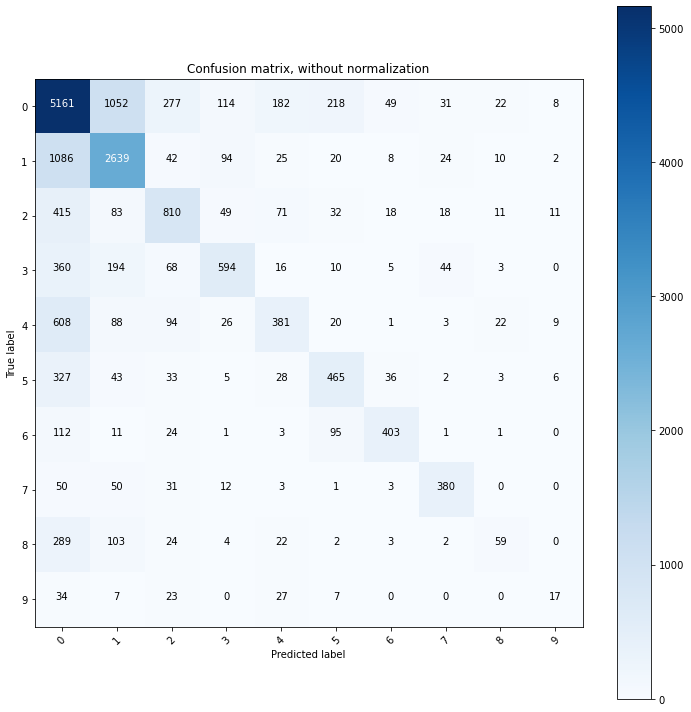

In [21]:
# Plot non-normalized confusion matrix
plt.figure( figsize = ( 10, 10 ) )
plot_confusion_matrix( cnf_matrix, classes = range( 0, 10 ),
                      title = 'Confusion matrix, without normalization' )

Normalized confusion matrix
[[7.25e-01 1.48e-01 3.89e-02 1.60e-02 2.56e-02 3.06e-02 6.89e-03 4.36e-03
  3.09e-03 1.12e-03]
 [2.75e-01 6.68e-01 1.06e-02 2.38e-02 6.33e-03 5.06e-03 2.03e-03 6.08e-03
  2.53e-03 5.06e-04]
 [2.73e-01 5.47e-02 5.34e-01 3.23e-02 4.68e-02 2.11e-02 1.19e-02 1.19e-02
  7.25e-03 7.25e-03]
 [2.78e-01 1.50e-01 5.26e-02 4.59e-01 1.24e-02 7.73e-03 3.86e-03 3.40e-02
  2.32e-03 0.00e+00]
 [4.86e-01 7.03e-02 7.51e-02 2.08e-02 3.04e-01 1.60e-02 7.99e-04 2.40e-03
  1.76e-02 7.19e-03]
 [3.45e-01 4.54e-02 3.48e-02 5.27e-03 2.95e-02 4.91e-01 3.80e-02 2.11e-03
  3.16e-03 6.33e-03]
 [1.72e-01 1.69e-02 3.69e-02 1.54e-03 4.61e-03 1.46e-01 6.19e-01 1.54e-03
  1.54e-03 0.00e+00]
 [9.43e-02 9.43e-02 5.85e-02 2.26e-02 5.66e-03 1.89e-03 5.66e-03 7.17e-01
  0.00e+00 0.00e+00]
 [5.69e-01 2.03e-01 4.72e-02 7.87e-03 4.33e-02 3.94e-03 5.91e-03 3.94e-03
  1.16e-01 0.00e+00]
 [2.96e-01 6.09e-02 2.00e-01 0.00e+00 2.35e-01 6.09e-02 0.00e+00 0.00e+00
  0.00e+00 1.48e-01]]


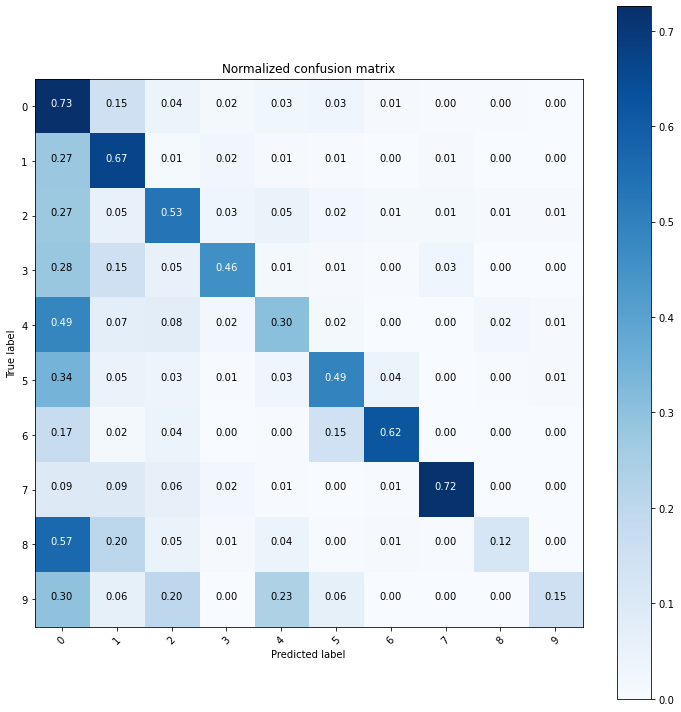

In [22]:
# Plot normalized confusion matrix
plt.figure( figsize = ( 10, 10 ) )
plot_confusion_matrix( cnf_matrix, classes = range( 0, 10 ), normalize = True,
                      title = 'Normalized confusion matrix')

 Las redes Neuronales son Multi etiqueta me permiten identificar multiples clases al mismo tiempo Sabemos que la clase se comporta bien, el modelo identifica correctamente y lo sabemos por que el numero es grande 
 El modelo identifica el modelo el 78 porciento de las veces de manera correcta el genro (genero) sabemos que no es
perfecto pero se equivoca en menor medida en menor medida 


# b) Pruebe con una arquitectura de red diferente y valide si el modelo mejora o se degrada

In [23]:
# Creación del modelo de redes neuronales
neural_model = MLPClassifier( hidden_layer_sizes = 120 )

In [24]:
# Ajuste del modelo a partir de los datos de entrenamiento
neural_model.fit( X_train, Y_train )

D:\programasAparte\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=120)

In [25]:
# Prediciendo a partir de los datos de prueba
predictions = neural_model.predict( X_test )

In [26]:
# Compute confusion matrix
cnf_matrix = confusion_matrix( Y_test.ravel().tolist(), predictions.round().tolist() )
np.set_printoptions( precision = 2 )

Confusion matrix, without normalization
[[5361  889  176  157  220  183   41   38   30   19]
 [1215 2465   34  131   35   16    8   28   15    3]
 [ 499   83  693   69   88   23   17   24   10   12]
 [ 373  157   48  641   13    7    2   51    1    1]
 [ 613   79   67   32  415    8    2    4   21   11]
 [ 360   42   23    6   33  440   33    1    4    6]
 [ 133   12   13    4    3   86  397    2    0    1]
 [  65   36   20   17    4    0    2  386    0    0]
 [ 317   83   21    7   22    0    0    1   56    1]
 [  33   10   19    0   27    2    0    0    4   20]]


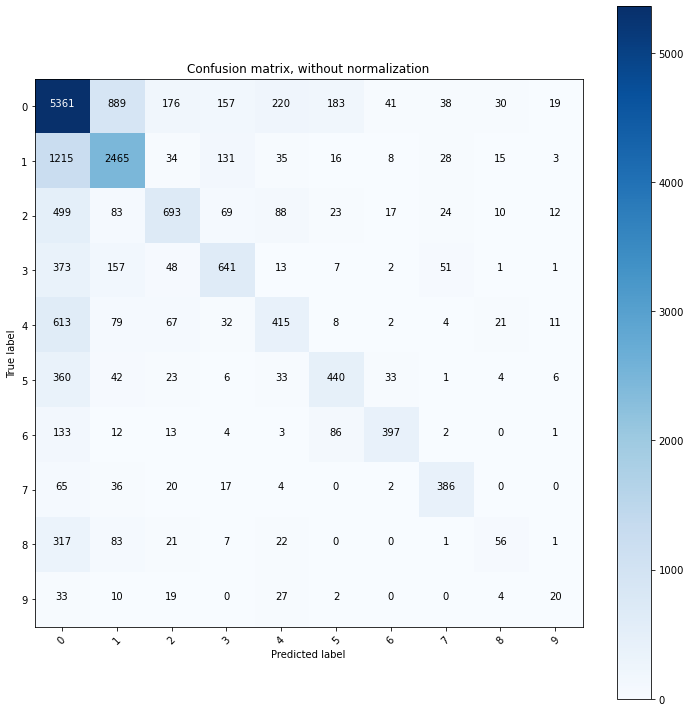

In [27]:
# Plot non-normalized confusion matrix
plt.figure( figsize = ( 10, 10 ) )
plot_confusion_matrix( cnf_matrix, classes = range( 0, 10 ),
                      title = 'Confusion matrix, without normalization' )

Normalized confusion matrix
[[0.75 0.12 0.02 0.02 0.03 0.03 0.01 0.01 0.   0.  ]
 [0.31 0.62 0.01 0.03 0.01 0.   0.   0.01 0.   0.  ]
 [0.33 0.05 0.46 0.05 0.06 0.02 0.01 0.02 0.01 0.01]
 [0.29 0.12 0.04 0.5  0.01 0.01 0.   0.04 0.   0.  ]
 [0.49 0.06 0.05 0.03 0.33 0.01 0.   0.   0.02 0.01]
 [0.38 0.04 0.02 0.01 0.03 0.46 0.03 0.   0.   0.01]
 [0.2  0.02 0.02 0.01 0.   0.13 0.61 0.   0.   0.  ]
 [0.12 0.07 0.04 0.03 0.01 0.   0.   0.73 0.   0.  ]
 [0.62 0.16 0.04 0.01 0.04 0.   0.   0.   0.11 0.  ]
 [0.29 0.09 0.17 0.   0.23 0.02 0.   0.   0.03 0.17]]


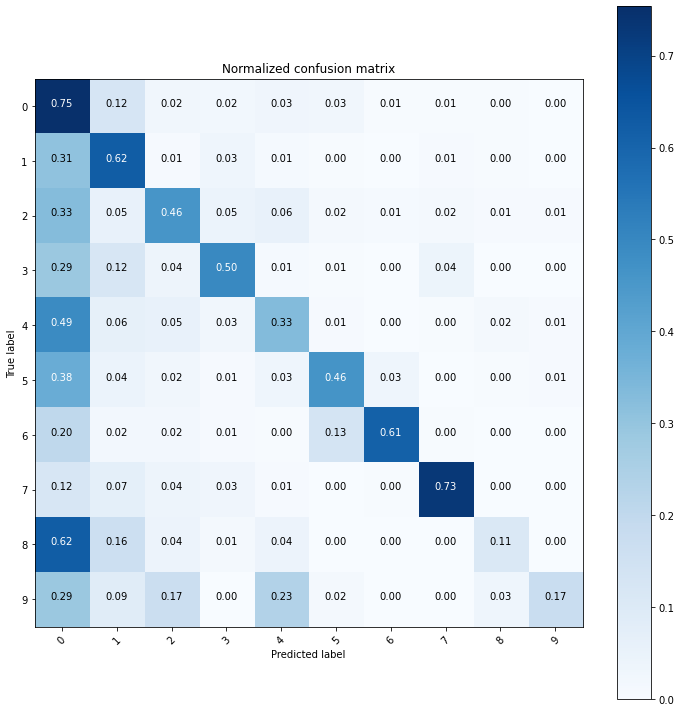

In [28]:
# Plot normalized confusion matrix
plt.figure( figsize = ( 10, 10 ) )
plot_confusion_matrix( cnf_matrix, classes = range( 0, 10 ), normalize = True,
                      title = 'Normalized confusion matrix')

Se puede percibir, haciendo uso de una nueno parametro, el cual hace referencia a la las capas (hidden_layer_sizes = 120),
Que el modelo si sufre, un pequeño cambio, pero no se consifdera que el modelo se haya degradado es más, hubo una mejora del
modelo ya que se percibe que acierta en un mayor porcentaje las clases evaluadas.

# RESPUESTA

## 7) Entrene un modelo usando una red neuronal

#### a ¿Cuales son las clases o géneros para las que más se equivoca el modelo?

La clase para la que peor se comporta el modelo es "pop", se puede observar que el modelo solo identifica correctamente
en un 0.007 por ciento de manera correcta el genero, siendo este porcentaje el menor del resto de las clases.

La segunda clase para la cual el modelo se equivoca identificando el genero es para "hip-hop" ya que se puede observar que
acierta identificando el genero solo un 22 porciento.

La tercera clase que identifica peor el genero es para "soul and reggae" ya que solo acierta identificando el genero en un
29 porciento.